In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [92]:
def count_method(url):
    data = pd.read_csv(url,low_memory=False,usecols=['enstation_time','exstation_time'])
    data['enstation_time'] = pd.to_datetime(data['enstation_time'])
    data['exstation_time'] = pd.to_datetime(data['exstation_time'],format='mixed')
    data = data[~data['exstation_time'].isna()]
    data = data[data['enstation_time'] != data['exstation_time']]
    data['duration'] = ((data['exstation_time'] - data['enstation_time']).dt.seconds) / 60
    data['duration_round'] = np.round(data['duration'])
    duration = data['duration'].value_counts()
    duration_round = data['duration_round'].value_counts()
    duration_round = pd.DataFrame(duration_round).sort_values('duration_round')
    duration = pd.DataFrame(duration).sort_values('duration')
    return [duration,duration_round]

In [93]:
TC_data = count_method('0402TC-data下车时间五.csv')
UTC_data_CatBoost = count_method('0402CatBoost下车时间五.csv')
UTC_data_XGBoost = count_method('0402XG下车时间五.csv')
UTC_data_RF = count_method('0402RF下车时间五.csv')

In [94]:
TC_data[1]

,count
duration_round,
3.0,130409
4.0,280283
5.0,284183
6.0,289112
7.0,271900
...,...
96.0,4481
97.0,4117
98.0,4279


In [95]:
data = pd.DataFrame({'duration_round':TC_data[1].index,'TC-data':TC_data[1]['count'],'Cat':UTC_data_CatBoost[1]['count'],
              'XG':UTC_data_XGBoost[1]['count'],'RF':UTC_data_RF[1]['count']},index=None)

In [106]:
data

,duration_round,TC-data,Cat,XG,RF
duration_round,,,,,
3.0,3.0,130409,216712,194577,195952
4.0,4.0,280283,483578,420333,427803
5.0,5.0,284183,506924,430233,438918
6.0,6.0,289112,520379,439909,449756
7.0,7.0,271900,482963,411898,421212
...,...,...,...,...,...
96.0,96.0,4481,10082,10100,9871
97.0,97.0,4117,10009,10129,9637
98.0,98.0,4279,10107,9901,9588


In [107]:
bins

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [108]:
bins = [i for i in range(0,100,5)]
out = pd.DataFrame(columns=['区间'])
out_1 = []
out_2 = []
tem_1 = data.copy()
for i in bins:
    tem_2 = tem_1[tem_1['duration_round'].between(i,i+5,inclusive='left')]
    out_1.append(f'[{i},{i+5})')
    out_2.append([np.sum(tem_2[j]) for j in ['TC-data','Cat','XG','RF']])
#     print(f'区间：[{i},{i+5})   ')
out['区间'] = out_1
out_2 = np.array(out_2)
out['TC-data'] = out_2[:,0]
out['Cat'] = out_2[:,1]
out['XG'] = out_2[:,2]
out['RF'] = out_2[:,3]

In [109]:
out

,区间,TC-data,Cat,XG,RF
0,"[0,5)",410692,700290,614910,623755
1,"[5,10)",1357674,2403001,2059080,2101915
2,"[10,15)",1021607,1645445,1548015,1563509
3,"[15,20)",710609,985278,1048895,1046805
4,"[20,25)",498825,624996,731975,729464
5,"[25,30)",344054,404949,505202,497455
6,"[30,35)",239743,278951,360683,353135
7,"[35,40)",168016,198895,258549,254049
8,"[40,45)",117713,155086,193510,190556
9,"[45,50)",82895,121256,148587,146371


In [110]:
np.sum(out[8:]).index

Index(['区间', 'TC-data', 'Cat', 'XG', 'RF'], dtype='object')

In [111]:
sum_data = pd.DataFrame([{i:j for i,j in zip(np.sum(out[8:]).index,np.sum(out[8:]).values)}])

In [112]:
sum_data['区间'] = '>40'

In [113]:
sum_data

,区间,TC-data,Cat,XG,RF
0,>40,527212,918187,1040255,1019232


In [114]:
out = pd.concat([out[:8],sum_data]).reset_index(drop=True)

In [115]:
out

,区间,TC-data,Cat,XG,RF
0,"[0,5)",410692,700290,614910,623755
1,"[5,10)",1357674,2403001,2059080,2101915
2,"[10,15)",1021607,1645445,1548015,1563509
3,"[15,20)",710609,985278,1048895,1046805
4,"[20,25)",498825,624996,731975,729464
5,"[25,30)",344054,404949,505202,497455
6,"[30,35)",239743,278951,360683,353135
7,"[35,40)",168016,198895,258549,254049
8,>40,527212,918187,1040255,1019232


In [116]:
out

,区间,TC-data,Cat,XG,RF
0,"[0,5)",410692,700290,614910,623755
1,"[5,10)",1357674,2403001,2059080,2101915
2,"[10,15)",1021607,1645445,1548015,1563509
3,"[15,20)",710609,985278,1048895,1046805
4,"[20,25)",498825,624996,731975,729464
5,"[25,30)",344054,404949,505202,497455
6,"[30,35)",239743,278951,360683,353135
7,"[35,40)",168016,198895,258549,254049
8,>40,527212,918187,1040255,1019232


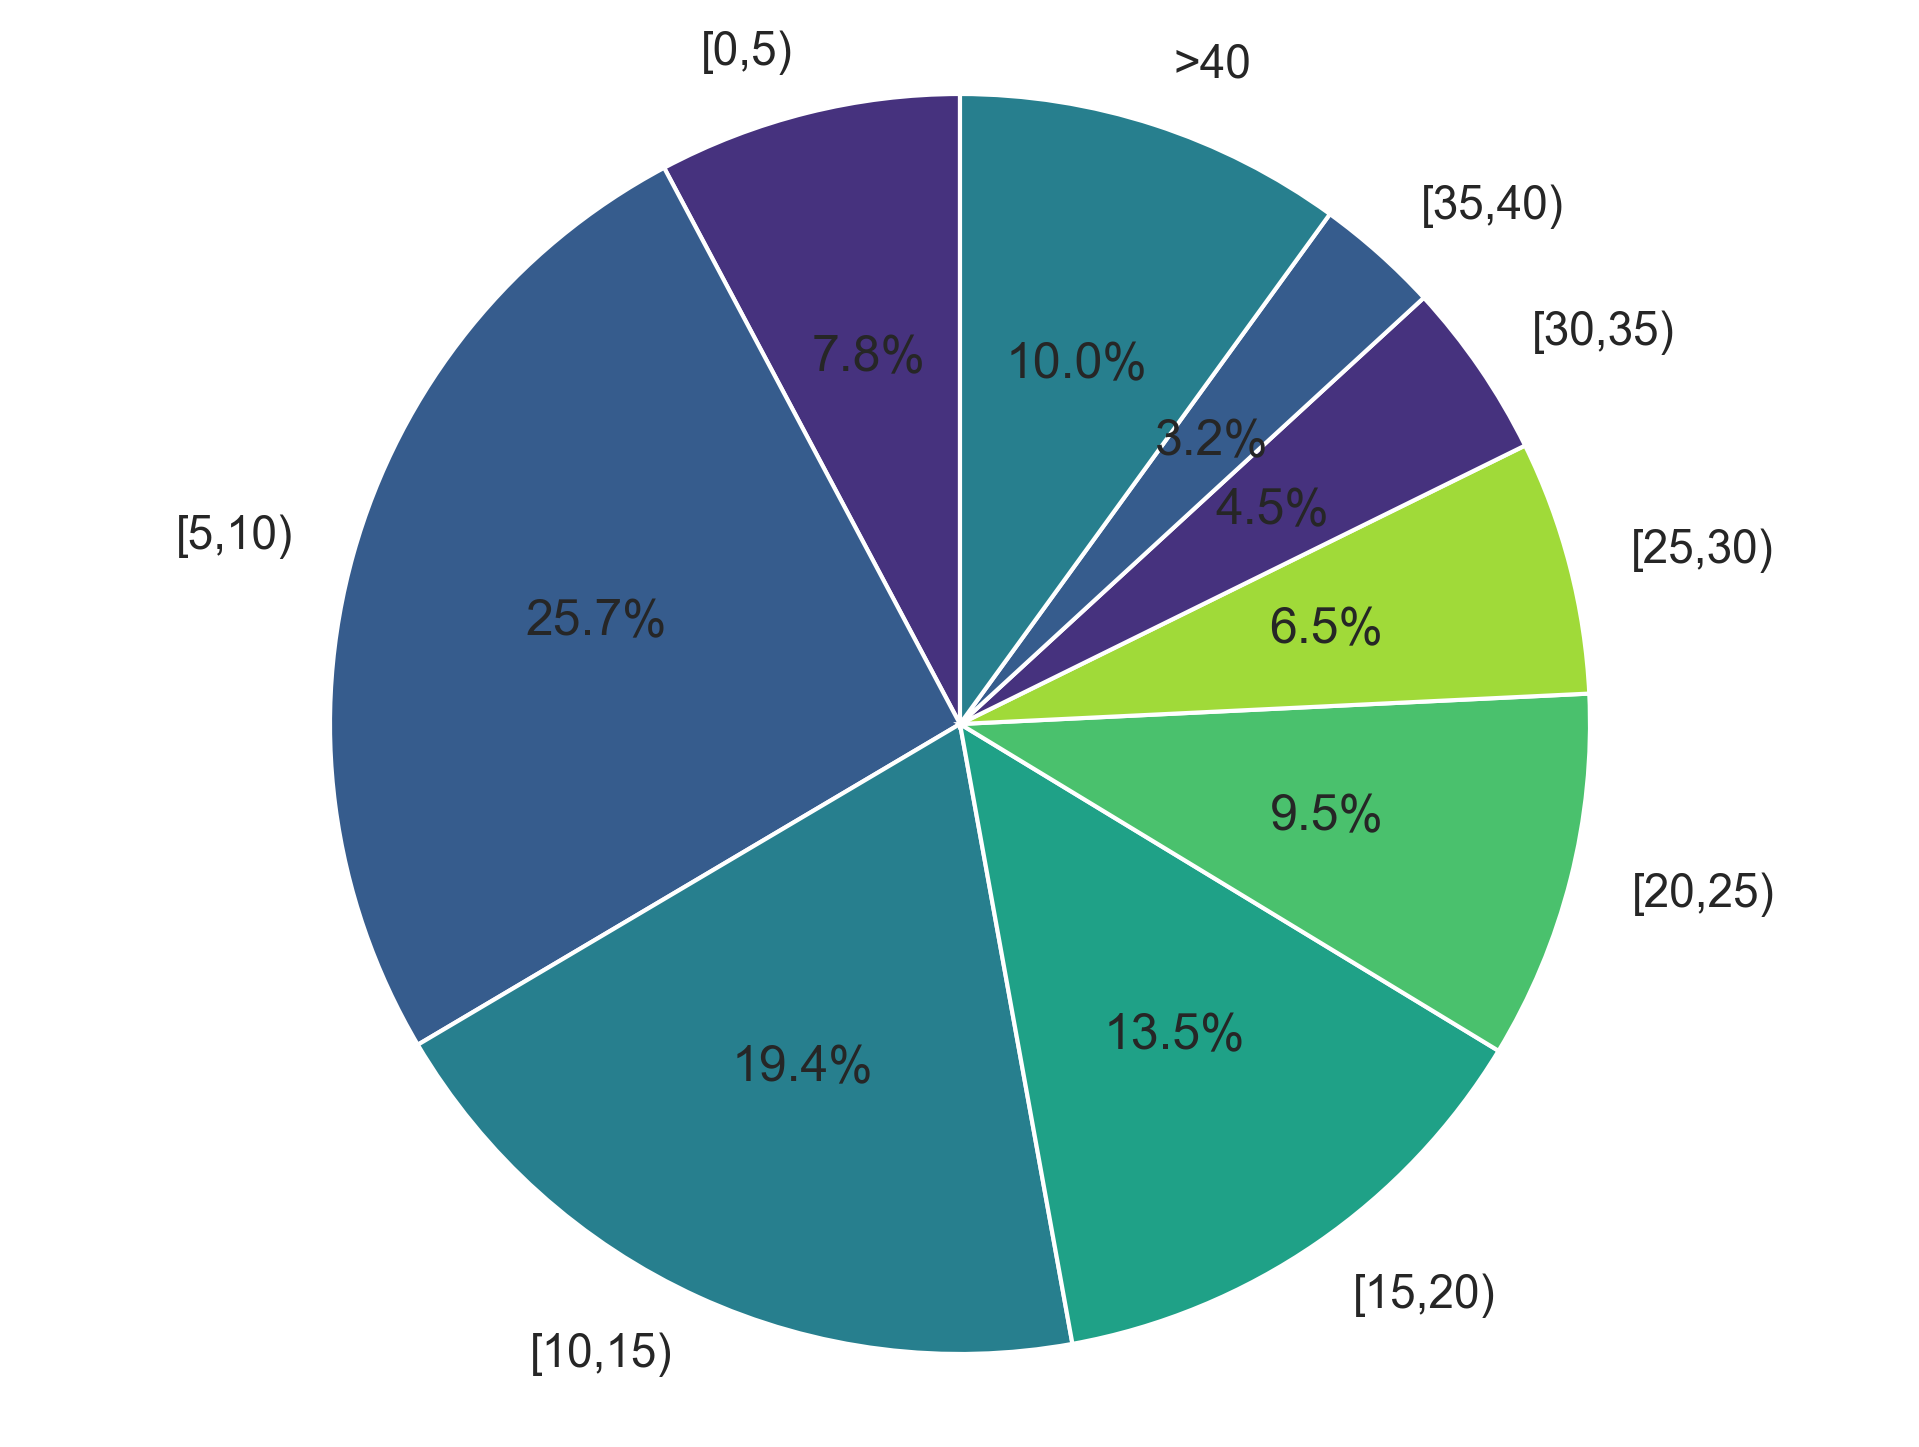

In [129]:
sns.set(style="ticks")
plt.figure(figsize=(8, 6),dpi=300)
plt.pie(out['TC-data'], labels=out['区间'], 
        autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("viridis")) 
# plt.title('TC-data Commute Time Pie Chart', fontsize=14)
plt.axis('equal') 
plt.show()

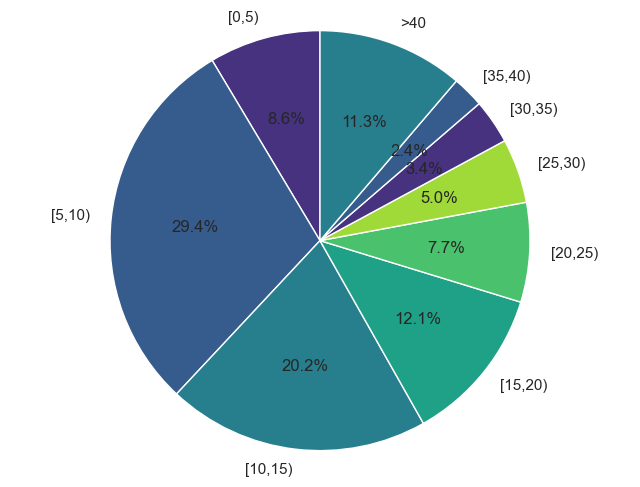

In [127]:
sns.set(style="ticks")
plt.figure(figsize=(8, 6))
plt.pie(out['Cat'], labels=out['区间'], 
        autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("viridis")) 
# plt.title('TC-data Commute Time Pie Chart', fontsize=14)
plt.axis('equal') 
plt.show()

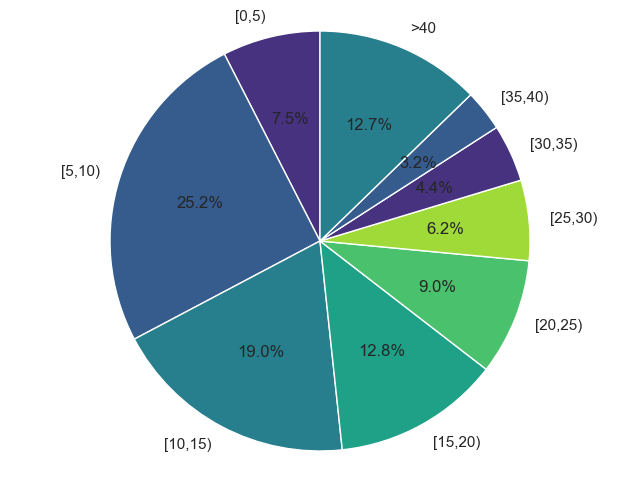

In [128]:
sns.set(style="ticks")
plt.figure(figsize=(8, 6))
plt.pie(out['XG'], labels=out['区间'], 
        autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("viridis")) 
# plt.title('TC-data Commute Time Pie Chart', fontsize=14)
plt.axis('equal') 
plt.show()

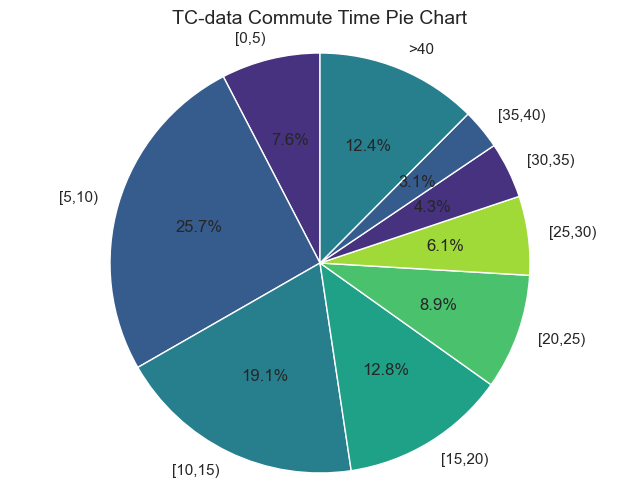

In [125]:
sns.set(style="ticks")
plt.figure(figsize=(8, 6))
plt.pie(out['RF'], labels=out['区间'], 
        autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("viridis")) 
plt.title('TC-data Commute Time Pie Chart', fontsize=14)
plt.axis('equal') 
plt.show()